### Student Information
Name: 王尹辰

Student ID: s11350315

GitHub ID: 73210839

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [6]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [25]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


### **>>> Exercise 1:**  

In [43]:
# print the first three samples
print(df[:3])

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...


### **>>> Exercise 2:** 

In [48]:
# Experiment with other querying techniques using pandas dataframes.
df.get("comment")

0       He was a singer with a golden voice that I lov...
1       The mist beautiful voice ever I listened to hi...
2       I have most of Mr. Reeves songs.  Always love ...
3       30 day leave from 1st tour in Viet Nam to conv...
4       listening to his songs reminds me of my mum wh...
                              ...                        
1495    i don't know!..but the opening of the video,.....
1496    it's sad this is such a beautiful song when yo...
1497    Dear Friend, I think age and time is not that ...
1498    I was born in 1954 and started to be aware of ...
1499    This is the first CD I bought after my marriag...
Name: comment, Length: 1500, dtype: object

### **>>> Exercise 3:** 

In [51]:
# Try to fetch records belonging to the nostalgia sentiment, and query every 10th record. Only show the first 5 records.
print(df[df['sentiment']=='nostalgia'].iloc[::10][:5])

    sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...


### **>>> Exercise 4:** 

In [53]:
import helpers.data_mining_helpers as dmh

In [54]:
# calculating missing values by column
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [55]:
# calculating missing values by record
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [61]:
# create a corrupted dataframe
dummy_series = pd.Series(["dummy_record"], index=["sentiment"])

result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [75]:
# corrupt the original dataframe
dummy_dict = [{'sentiment': 'dummy_record'}]
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)
# check the corrupted record
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [76]:
# clear the corruption
df.dropna(inplace=True)
# check the corrupted record
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### **>>> Exercise 6:** 

In [81]:
# check duplicated
sum(df.duplicated())

0

In [82]:
# clear duplicated
df.drop_duplicates(keep=False, inplace=True)
# check again
sum(df.duplicated())

0

In [83]:
# sampling
df_sample = df.sample(n=1000)
df_sample[:4]

,sentiment,comment
948,nostalgia,"i first heard this song August of 2018, and i ..."
1256,nostalgia,Met my first love and this song was mine to he...
1138,nostalgia,Every time when I listen to this song in the n...
872,nostalgia,Wow I was 16 when this came out! Incredible bu...


### **>>> Exercise 7:** 

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        501
not nostalgia    499
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

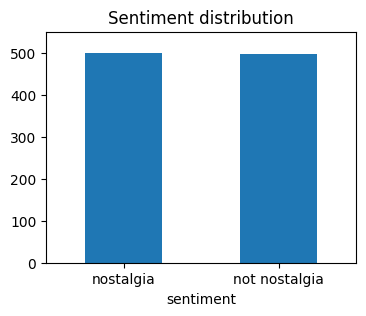

In [94]:
print(df_sample.sentiment.value_counts())
# auto change the upper_bound
upper_bound = max(df_sample.sentiment.value_counts()+50)

# plot barchart for df
plt.style.use('default')
df_sample.sentiment.value_counts().plot(kind = 'bar', 
                                        title = 'Sentiment distribution', 
                                        ylim = [0, upper_bound], 
                                        rot = 0, figsize = (4, 3))

### **>>> Exercise 8:** 

In [100]:
import numpy as np

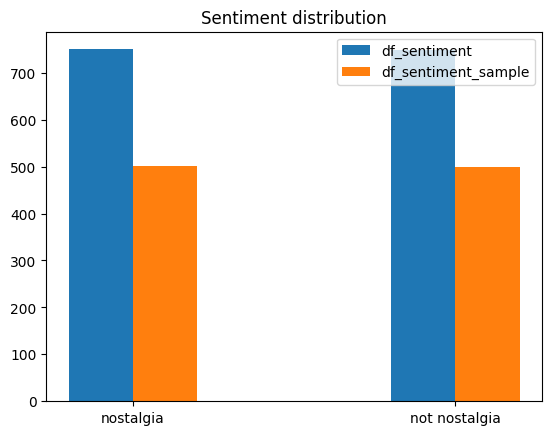

In [101]:
# n indice
ind = np.arange(2)

width = 0.2    

# df_sentiment_sample will perfectly next to df_sentiment, because ind+width - ind == width which is the df_sentiment_sample's width
plt.bar(ind, df.sentiment.value_counts(), width, label='df_sentiment')
plt.bar(ind + width, df_sample.sentiment.value_counts(), width, label='df_sentiment_sample')

plt.title('Sentiment distribution')

# place the sentiment in the middle
plt.xticks(ind + width / 2, ['nostalgia', 'not nostalgia'])

plt.legend(loc='best')
plt.show()

### **>>> Exercise 9:** 

In [98]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [108]:
# dismantle the comments
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [105]:
df[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [107]:
list(df[:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### **>>> Exercise 10:** 

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()

In [114]:
# the analyzer can remove stop words and dismantle the sentence to easily analyze
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [117]:
df_counts = count_vect.fit_transform(df.comment)
print(df_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [120]:
df_counts.shape

(1498, 3730)

In [124]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [125]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [148]:
print(count_vect.get_feature_names_out()[df_counts[0].nonzero()[1]])

['he' 'was' 'singer' 'with' 'golden' 'voice' 'that' 'love' 'to' 'hear'
 'all' 'the' 'time' 'his' 'great' 'fan' 'at' 'age' 'of' '16years' 'in'
 'those' 'days' 'and' 'still' 'now' 'although' 'we' 'have' 'many'
 'singers' 'but' 'can' 'vouch' 'for' 'jim' 'reeves' 'you' 'feel' 'relaxed'
 'emotional' 'loving' 'thank' 'lord' 'life']


### **>>> Exercise 11:** 

In [149]:
import seaborn as sns

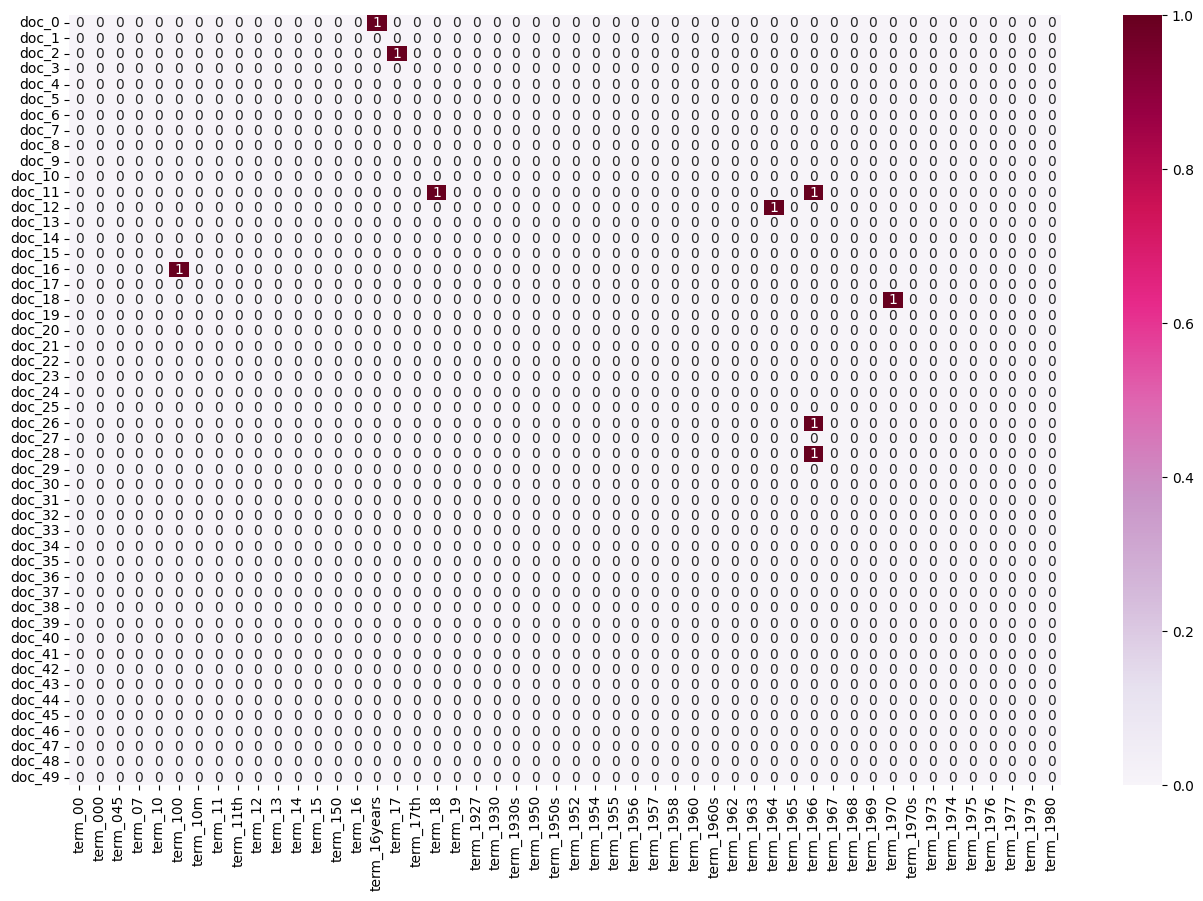

In [152]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]
plot_z = df_counts[0:50, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(16, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 12:** 

In [162]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:, j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
print(term_frequencies[0])

1


C:\Users\eason\AppData\Local\Temp\ipykernel_23436\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


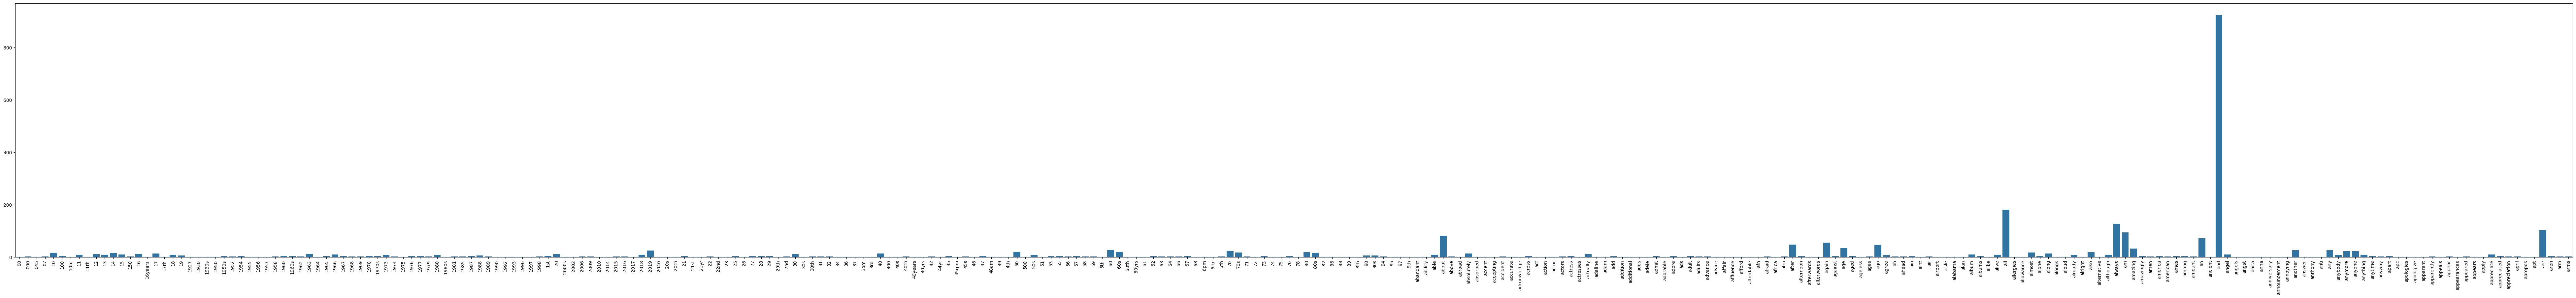

In [163]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### **>>> Exercise 13:** 

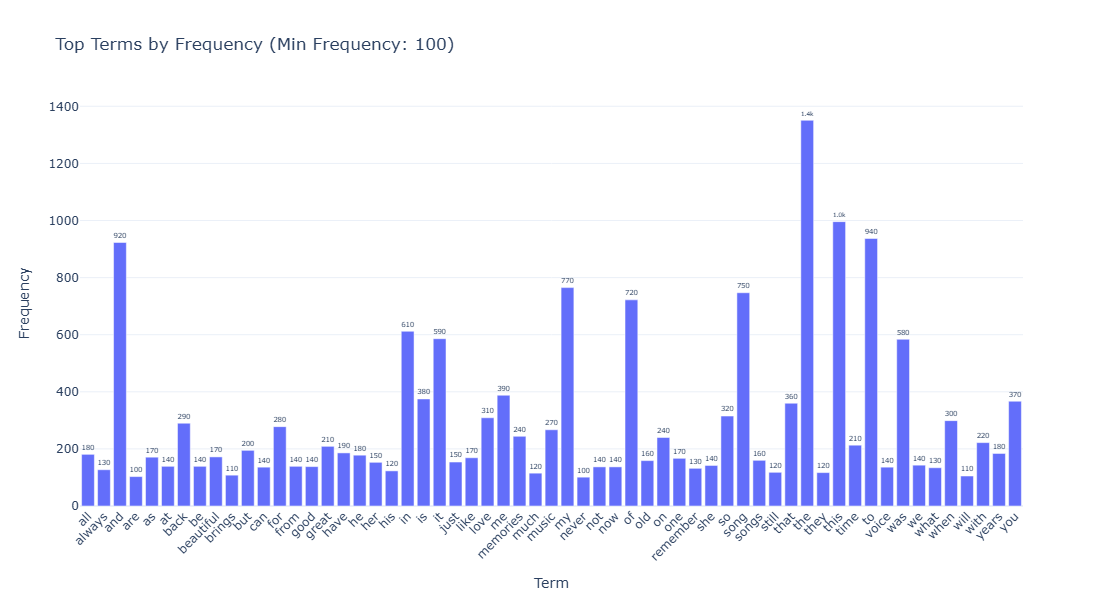

In [168]:
# Set a frequency threshold
min_frequency = 100  # Adjust as necessary
filtered_terms = term_frequency_df[term_frequency_df['Frequency'] > min_frequency]

# Create an interactive bar chart with Plotly for filtered terms
fig = px.bar(
    filtered_terms,
    x='Term',
    y='Frequency',
    title=f'Top Terms by Frequency (Min Frequency: {min_frequency})',
    labels={'Frequency': 'Frequency'},
    text='Frequency',
    template='plotly_white'
)

# Update layout for better visibility
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)

# Show the plot
fig.show()


### **>>> Exercise 14:** 

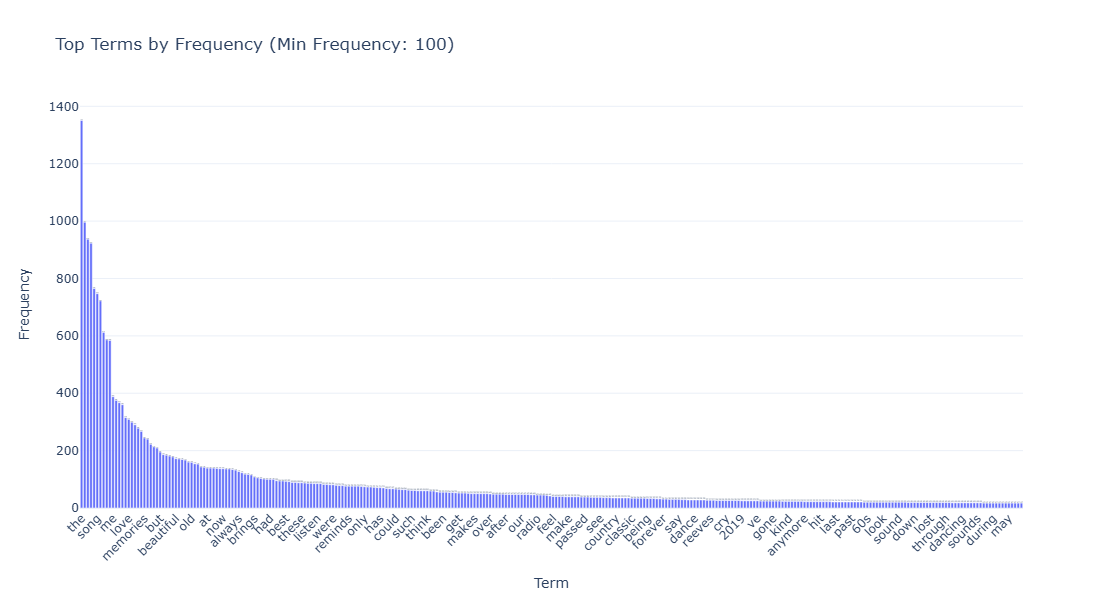

In [170]:
# Set a frequency threshold
min_frequency = 100  # Adjust as necessary
filtered_terms = term_frequency_df[term_frequency_df['Frequency'] > min_frequency]

# Create a DataFrame for Plotly
term_frequency_df = pd.DataFrame({'Term': feature_names, 'Frequency': term_frequencies})

# Optionally filter for the top N terms (for example, top 300)
top_n = 300
top_terms = term_frequency_df.nlargest(top_n, 'Frequency')

# Create an interactive bar chart with Plotly for filtered terms
fig = px.bar(
    top_terms,
    x='Term',
    y='Frequency',
    title=f'Top Terms by Frequency (Min Frequency: {min_frequency})',
    labels={'Frequency': 'Frequency'},
    text='Frequency',
    template='plotly_white'
)

# Update layout for better visibility
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)

# Show the plot
fig.show()


In [ ]:
### **>>> Exercise 14:** 

C:\Users\eason\AppData\Local\Temp\ipykernel_23436\3655612951.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



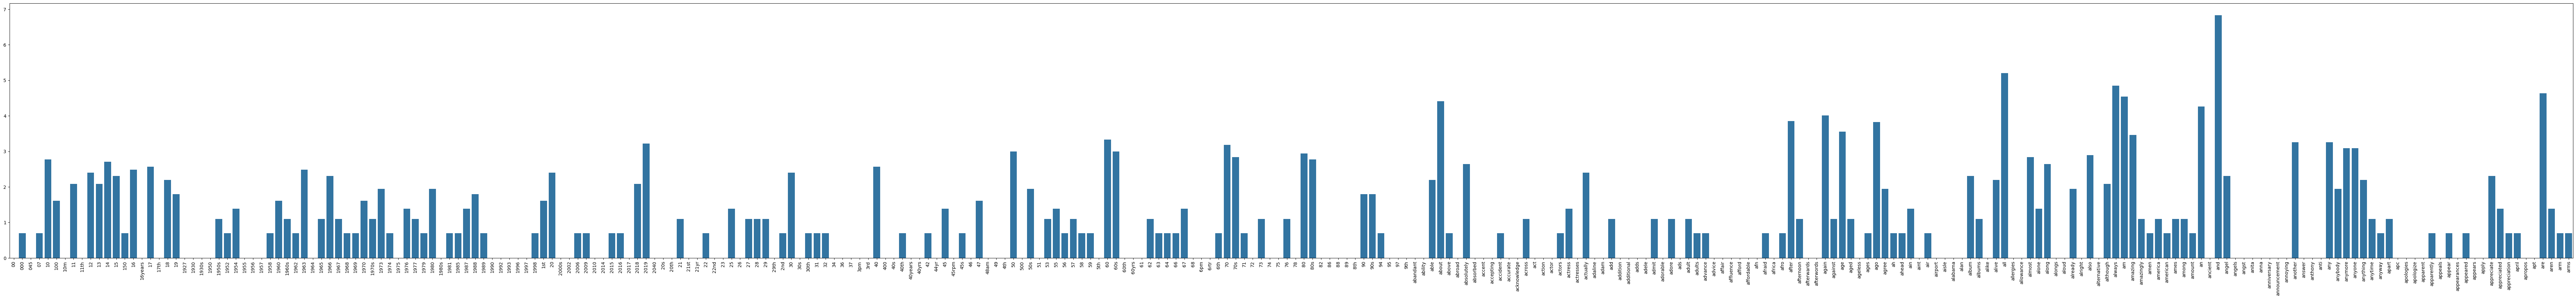

In [171]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

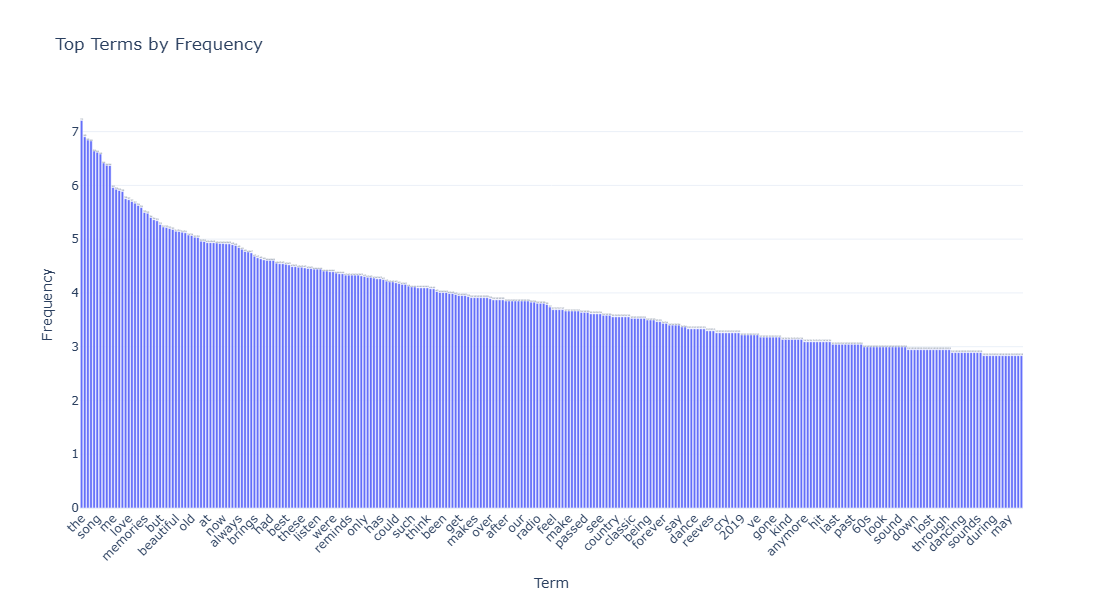

In [172]:
X_counts = count_vect.fit_transform(df.comment)  

# Calculate term frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]
feature_names = count_vect.get_feature_names_out()  

# Create a DataFrame for Plotly
term_frequency_df = pd.DataFrame({'Term': feature_names, 'Frequency': term_frequencies_log})

# Optionally filter for the top N terms (for example, top 300)
top_n = 300
top_terms = term_frequency_df.nlargest(top_n, 'Frequency')

# Create an interactive bar chart with Plotly
fig = px.bar(
    top_terms,
    x='Term',
    y='Frequency',
    title='Top Terms by Frequency',
    labels={'Frequency': 'Frequency'},
    text='Frequency',
    template='plotly_white'
)

# Update layout for better visibility
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)

# Show the plot
fig.show()